<a href="https://colab.research.google.com/github/bose9999/FlightPricePredcition/blob/master/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes = True)

In [3]:
df = pd.read_csv('/content/Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df2 = df.drop(columns=['Unnamed: 0','flight'])
df2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#Exploratory Data Analysis

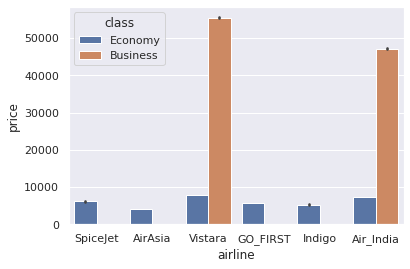

In [5]:
sns.barplot(data=df, x="airline",y="price", hue="class")

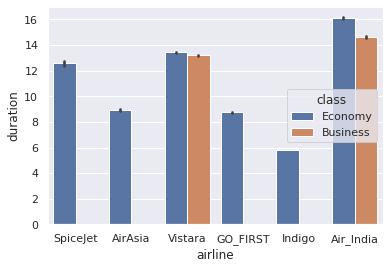

In [6]:
sns.barplot(data=df, x="airline",y="duration", hue="class")

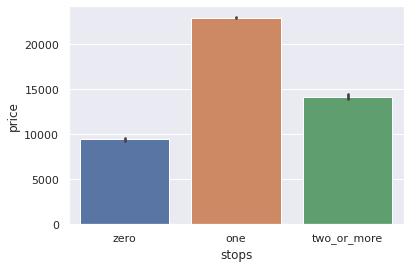

In [7]:
sns.barplot(data=df, x="stops", y="price")

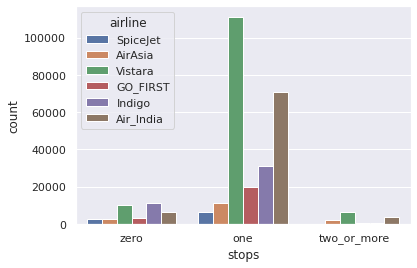

In [8]:
sns.countplot(data=df, x="stops", hue="airline")

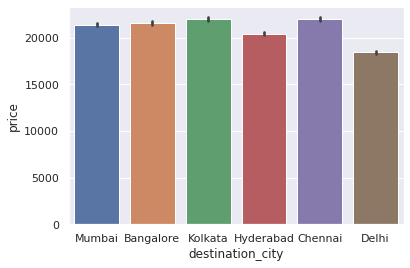

In [9]:
sns.barplot(data=df, x="destination_city", y="price")

#Data Preprocessing

In [10]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [11]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [12]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [13]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [14]:
#Change value in airline column
df2['airline'] = df2['airline'].replace(['SpiceJet'],'0')
df2['airline'] = df2['airline'].replace(['AirAsia'],'1')
df2['airline'] = df2['airline'].replace(['Vistara'],'2')
df2['airline'] = df2['airline'].replace(['GO_FIRST'],'3')
df2['airline'] = df2['airline'].replace(['Indigo'],'4')
df2['airline'] = df2['airline'].replace(['Air_India'],'5')
#Change value in source_city column
df2['source_city'] = df2['source_city'].replace(['Delhi'],'0')
df2['source_city'] = df2['source_city'].replace(['Mumbai'],'1')
df2['source_city'] = df2['source_city'].replace(['Bangalore'],'2')
df2['source_city'] = df2['source_city'].replace(['Kolkata'],'3')
df2['source_city'] = df2['source_city'].replace(['Hyderabad'],'4')
df2['source_city'] = df2['source_city'].replace(['Chennai'],'5')
#Change value in departure_time column
df2['departure_time'] = df2['departure_time'].replace(['Evening'],'0')
df2['departure_time'] = df2['departure_time'].replace(['Early_Morning'],'1')
df2['departure_time'] = df2['departure_time'].replace(['Morning'],'2')
df2['departure_time'] = df2['departure_time'].replace(['Afternoon'],'3')
df2['departure_time'] = df2['departure_time'].replace(['Night'],'4')
df2['departure_time'] = df2['departure_time'].replace(['Late_Night'],'5')
#Change value in stops column
df2['stops'] = df2['stops'].replace(['zero'],'0')
df2['stops'] = df2['stops'].replace(['one'],'1')
df2['stops'] = df2['stops'].replace(['two_or_more'],'2')
#Change value in arrival_time column
df2['arrival_time'] = df2['arrival_time'].replace(['Evening'],'0')
df2['arrival_time'] = df2['arrival_time'].replace(['Early_Morning'],'1')
df2['arrival_time'] = df2['arrival_time'].replace(['Morning'],'2')
df2['arrival_time'] = df2['arrival_time'].replace(['Afternoon'],'3')
df2['arrival_time'] = df2['arrival_time'].replace(['Night'],'4')
df2['arrival_time'] = df2['arrival_time'].replace(['Late_Night'],'5')
#Change value in destination_city column
df2['destination_city'] = df2['destination_city'].replace(['Delhi'],'0')
df2['destination_city'] = df2['destination_city'].replace(['Mumbai'],'1')
df2['destination_city'] = df2['destination_city'].replace(['Bangalore'],'2')
df2['destination_city'] = df2['destination_city'].replace(['Kolkata'],'3')
df2['destination_city'] = df2['destination_city'].replace(['Hyderabad'],'4')
df2['destination_city'] = df2['destination_city'].replace(['Chennai'],'5')
#Change value in class column
df2['class'] = df2['class'].replace(['Economy'],'0')
df2['class'] = df2['class'].replace(['Business'],'1')
df2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,0,0,0,4,1,0,2.17,1,5953
1,0,0,1,0,2,1,0,2.33,1,5953
2,1,0,1,0,1,1,0,2.17,1,5956
3,2,0,2,0,3,1,0,2.25,1,5955
4,2,0,2,0,2,1,0,2.33,1,5955


In [15]:
df2.dtypes

airline              object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

Change object datatypes into integer

In [16]:
df2['airline'] = pd.to_numeric(df2['airline'])
df2['source_city'] = pd.to_numeric(df2['source_city'])
df2['departure_time'] = pd.to_numeric(df2['departure_time'])
df2['stops'] = pd.to_numeric(df2['stops'])
df2['arrival_time'] = pd.to_numeric(df2['arrival_time'])
df2['destination_city'] = pd.to_numeric(df2['destination_city'])
df2['class'] = pd.to_numeric(df2['class'])
df2.dtypes

airline               int64
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

#Data Correlation Heatmap

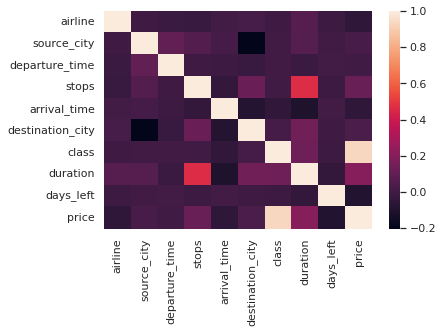

In [20]:
sns.heatmap(df2.corr(), fmt='.2g')

#Machine Learning Model Building

In [17]:
X = df2.drop('price', axis=1)
y = df2['price']

In [18]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

#Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1148.8754338036458
MSE is 11793103.737535143
R2 score is 0.976935892693374
RMSE score is 3434.1088709496594


In [ ]:
y_pred = dtree.predict(X_test)
y_pred = [round(value) for value in y_pred]
acc = accuracy_score(y_test, y_pred)
print('Accuracy score for DecisionTreeRegressor:', acc)


#Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
from sklearn import metrics
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1065.2288574434292
MSE is 7329580.679628791
R2 score is 0.9856653312758136
RMSE score is 2707.319833272159


In [ ]:
y_pred = rf.predict(X_test)
y_pred = [round(value) for value in y_pred]
acc = accuracy_score(y_test, y_pred)
print('Accuracy score for RandomForestRegressor:', acc)


#Adaboost Regressor

In [25]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train, y_train)

AdaBoostRegressor(random_state=0)

In [26]:
from sklearn import metrics
import math
y_pred = ada.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 3636.786046750951
MSE is 33527783.060335092
R2 score is 0.9344287641771843
RMSE score is 5790.318044834419


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = ada.predict(X_test)
y_pred = [round(value) for value in y_pred]
acc = accuracy_score(y_test, y_pred)
print('Accuracy score for AdaBoostRegressor:', acc)


# MultiLayer Perceptron

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=0)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


In [ ]:
y_pred = mlp.predict(X_test)
y_pred = [round(value) for value in y_pred]
acc = accuracy_score(y_test, y_pred)
print('Accuracy score for MLPRegressor:', acc)


# **GradientBoosting**

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


MAE is 2896.8458078671592
MSE is 24117393.64248136
R2 score is 0.9528329295403459
RMSE score is 4910.946308246646


In [ ]:
y_pred = gbr.predict(X_test)
y_pred = [round(value) for value in y_pred]
acc = accuracy_score(y_test, y_pred)
print('Accuracy score for GradientBoostingRegressor:', acc)


# **SVR**

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))


In [ ]:
y_pred = svr.predict(X_test)
y_pred = [round(value) for value in y_pred]
acc = accuracy_score(y_test, y_pred)
print('Accuracy score for SVR:', acc)
